In [6]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
path = '/Users/charlesoneill/DataspellProjects/pytorch'
kmnist = datasets.KMNIST(path, train=True, 
                         transform=transforms.Compose([transforms.ToTensor()]),
                         download=False)
kmnist_val = datasets.KMNIST(path, train=False, 
                             transform=transforms.Compose([transforms.ToTensor()]),
                             download=False)

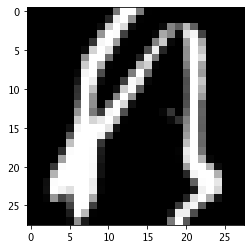

In [34]:
plt.imshow(np.squeeze(kmnist[0][0]), cmap='gray')
plt.show()

In [54]:
def plot_samples():
    fig, axs = plt.subplots(3,3)
    axs = axs.flatten()
    imgs = []
    for i in range(30, 39):
        imgs.append(np.squeeze(kmnist[i][0]))
    for img, ax in zip(imgs, axs):
        ax.imshow(img, cmap='gray', interpolation='none')
    plt.show()

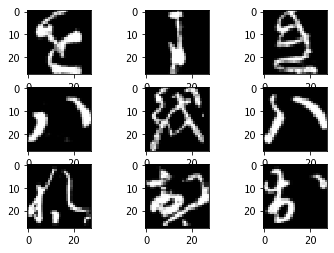

In [55]:
plot_samples()

In [69]:
kmnist[0][0].shape

torch.Size([1, 28, 28])

In [70]:
imgs = torch.stack([img_t for img_t, _ in kmnist], dim=3)
imgs.shape

torch.Size([1, 28, 28, 60000])

In [79]:
mean = imgs.view(1, -1).mean(dim=1)
std = imgs.view(1, -1).std(dim=1)
print(f"Pre-normalisation: mean = {mean.item()}, std = {std.item()}")

Pre-normalisation: mean = 0.19176216423511505, std = 0.3483428359031677


In [81]:
transform_norm = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean, std)])
n_kmnist = datasets.KMNIST(path, train=True, 
                         transform=transform_norm,
                         download=False)

n_kmnist_val = datasets.KMNIST(path, train=False, 
                             transform=transforms.Compose([transforms.ToTensor()]),
                             download=False)

In [83]:
# print new mean and std
n_imgs = torch.stack([img_t for img_t, _ in n_kmnist], dim=3)
mean = n_imgs.view(1, -1).mean(dim=1)
std = n_imgs.view(1, -1).std(dim=1)
print(f"Post-normalisation: mean = {np.round(mean.item(), 2)}, std = {std.item()}")

Post-normalisation: mean = -0.0, std = 1.0


In [86]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(n_kmnist, batch_size=64, shuffle=True)
val_dataloader = DataLoader(n_kmnist_val, batch_size=64, shuffle=False)

In [ ]:
class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()